In [1]:
import numpy as np
import matplotlib.pyplot as plt
from moirepy import BilayerMoireLattice, HexagonalLayer

In [2]:
lattice = BilayerMoireLattice(
    latticetype=HexagonalLayer,
    ll1=3, ll2=4,
    ul1=4, ul2=3,
    n1=1, n2=1,
    pbc=True # Mandatory for k-space
)

twist angle = 0.1646 rad (9.4300 deg)
74 cells in upper lattice
74 cells in lower lattice


In [3]:
k = np.array([0.1, 0.2])

# Matrices are smaller but complex: we use complex128 internally
Hk = lattice.generate_k_space_hamiltonian(
    k=k,
    tll=1.0, tuu=1.0,
    tul=0.1, tlu=0.1, # User must ensure tlu = conj(tul) for Hermiticity
)

print(f"Matrix shape: {Hk.shape}")

Matrix shape: (148, 148)


In [4]:
# Defined using the reciprocal lattice vectors of the moire system
G = np.array([0, 0])
K = (1/3) * (lattice.mlv1 + lattice.mlv2) 
M = (1/2) * lattice.mlv1

def get_path(points, steps=50):
    path = []
    for i in range(len(points) - 1):
        for t in np.linspace(0, 1, steps):
            path.append(points[i] * (1 - t) + points[i + 1] * t)
    return np.array(path)

k_path = get_path([G, K, M, G])

In [5]:
bands = []

for k in k_path:
    Hk = lattice.generate_k_space_hamiltonian(
        k=k, tll=1.0, tuu=1.0, tul=0.1, tlu=0.1
    )
    # Convert sparse k-matrix to dense for the eigensolver
    eigvals = np.linalg.eigvalsh(Hk.toarray())
    bands.append(eigvals)

bands = np.array(bands)

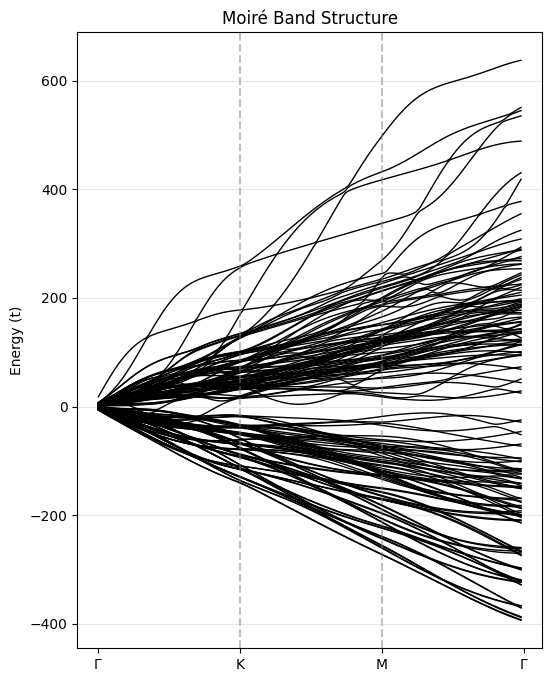

In [6]:
plt.figure(figsize=(6, 8))
plt.plot(bands, color='black', linewidth=1)

# Mark the high-symmetry transitions
plt.axvline(x=50, linestyle='--', color='gray', alpha=0.5)
plt.axvline(x=100, linestyle='--', color='gray', alpha=0.5)

plt.xticks([0, 50, 100, 150], [r'$\Gamma$', 'K', 'M', r'$\Gamma$'])
plt.ylabel("Energy (t)")
plt.title("Moiré Band Structure")
plt.grid(axis='y', alpha=0.3)
plt.savefig("1.webp", format='webp', dpi=300, bbox_inches='tight', pil_kwargs={'lossless': True})